In [2]:
!pip install tensorflow-hub


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/413.4 kB 435.7 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/413.4 kB 435.7 kB/s eta 0:00:01
   --- ----------------------------------- 41.0/413.4 kB 281.8 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/413.4 kB 273.8 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/413.4 kB 273.8 kB/s eta 0:00:02
   ------ -------------------------------- 71.7/413.4 kB 245.8 kB/s eta 0:00:02
   -------- ------------------------------ 92.2/413.4 kB 262.6 kB/s eta 0:00:02
   ---------- --------------------------- 112.6/413.4 kB 273.1 kB/s eta 0:00:02
   ---------- --------------------------- 112.6/413.4 kB 273.1 kB/s eta 0:00:02
   ----------- -------------------------- 122.9/413.4 kB 25

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.7 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow_hub as hub

In [4]:
# Function to load and preprocess images
def load_image(image_path, max_dim=512):
    img = Image.open(image_path)
    img = img.convert('RGB')
    img = np.array(img)

    # Resize image if it is too large
    max_dim = float(max_dim)
    scale = max_dim / max(img.shape[0], img.shape[1])
    new_shape = np.array(img.shape) * scale
    new_shape = new_shape.astype(int)
    img = Image.fromarray(img)
    img = img.resize((new_shape[1], new_shape[0]), Image.LANCZOS)

    img = np.array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)

    return img

In [5]:
# Function to deprocess image (convert back to uint8)
def deprocess_image(processed_img):
    processed_img = processed_img.numpy()
    processed_img = np.squeeze(processed_img, axis=0)
    processed_img = processed_img * 255
    processed_img = np.clip(processed_img, 0, 255).astype('uint8')

    return processed_img

In [6]:
# Function to display image
def display_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [7]:
# Load content and style images
content_path = 'base.jpg'  # Update path
style_path = 'style.jpg'  # Update path

In [8]:
content_image = load_image(content_path)
style_image = load_image(style_path)

In [9]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [10]:
stylized_image = hub_module(content_image, style_image)[0]

In [11]:
final_img = deprocess_image(stylized_image)

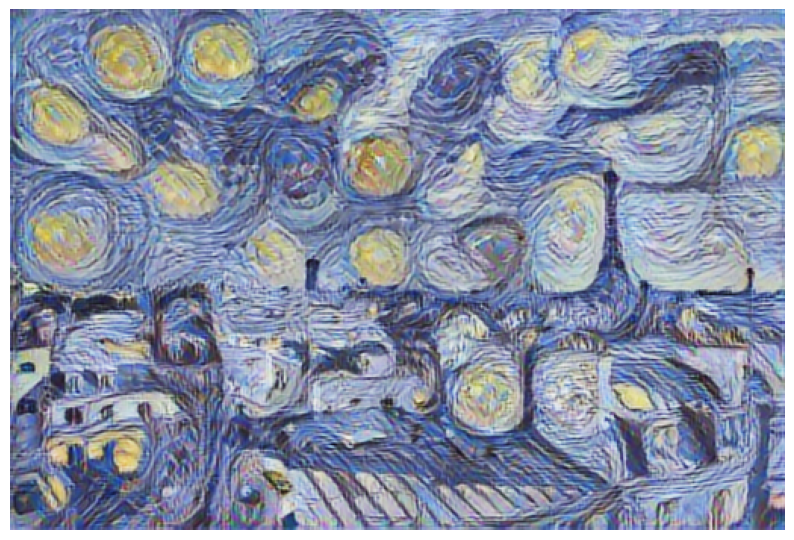

In [12]:
display_image(final_img)